In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Q:/Business Analytics/Data Science/Price Elasticity/trainingdata edited.csv')
df.shape

(40321, 634)

In [2]:
#create dataframe using the most common upc
dfupc = df[df['upc'].isin(['17000026700'])]
dfupc.shape

(1309, 634)

In [3]:
# convert date data from integer to datetime
datelist = dfupc['fyweekendingdateint'].tolist()
datelist2 = []
from datetime import datetime
for num in range (0,len(datelist)):
    datelist2.append (datetime(year=int(str(datelist[num])[0:4]), month=int(str(datelist[num])[4:6]), day=int(str(datelist[num])[6:8])))


In [4]:
# append datetime data to the dataframe
dfupc['datelist2']=datelist2
dfupc.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(1309, 635)

In [19]:
# sort by date
dfsorted = dfupc.sort_values(by=['datelist2'])
dfsorted.head(50)

,Unnamed: 0,datedimensionid,storeitemdimensionid,locationdimensionid,actualdate,upc,mfsfilenumber,storenumber,fyweekendingdateint,category,...,THH68_Ring5,ID,NAME,CompetitorsNearbyCount,CompetitorsAvgDriveTime,CompetitorsMinDriveTime,WalmartsNearbyCount,WalmartAvgDriveTime,WalmartMinDriveTime,datelist2
2429,2429,20170205,1005207,333,2/5/2017,1.700003e+10,1632,1632,20170205,Personal Care-Soaps,...,0,1632,Sioux Falls #3,12,8.164458,3.070838,4,9.877826,6.947116,2017-02-05
24314,24314,20170205,1005207,310,2/5/2017,1.700003e+10,1532,1532,20170205,Personal Care-Soaps,...,0,1532,Prairie Village,171,23.273302,4.629669,31,25.585528,11.659690,2017-02-05
39825,39825,20170205,1005207,284,2/5/2017,1.700003e+10,1464,1464,20170205,Personal Care-Soaps,...,3,1464,Olathe #2,117,18.873660,6.057491,20,18.505365,10.299624,2017-02-05
7831,7831,20170205,1005207,601,2/5/2017,1.700003e+10,1439,1439,20170205,Personal Care-Soaps,...,0,1439,New Hope,223,23.270580,5.547101,17,25.334341,12.832464,2017-02-05
34685,34685,20170205,1005207,209,2/5/2017,1.700003e+10,1148,1148,20170205,Personal Care-Soaps,...,0,1148,Des Moines #4,48,18.209501,4.281728,7,17.495626,6.112225,2017-02-05
34134,34134,20170205,1005207,286,2/5/2017,1.700003e+10,1466,1466,20170205,Personal Care-Soaps,...,1,1466,Omaha #2,100,17.719849,5.517127,18,17.418734,6.005436,2017-02-05
37648,37648,20170205,1005207,228,2/5/2017,1.700003e+10,1241,1241,20170205,Personal Care-Soaps,...,0,1241,Harlan,1,1.668633,1.668633,0,0.000000,0.000000,2017-02-05
38578,38578,20170205,1005207,269,2/5/2017,1.700003e+10,1410,1410,20170205,Personal Care-Soaps,...,0,1410,Mason City #1,5,6.874512,3.549414,1,5.820456,5.820456,2017-02-05
33661,33661,20170205,1005207,249,2/5/2017,1.700003e+10,1380,1380,20170205,Personal Care-Soaps,...,2,1380,Lee's Summit #1,117,23.876210,1.941641,21,23.664792,2.902325,2017-02-05
39446,39446,20170205,1005207,517,2/5/2017,1.700003e+10,7062,7062,20170205,Personal Care-Soaps,...,5,7062,Omaha DS,100,17.580468,2.201232,19,18.233236,9.594437,2017-02-05


In [6]:
# create dataframe with time series data for demand
dfdem = dfsorted[['datelist2','sevendmovement']]
dfdem.shape

(1309, 2)

In [7]:
# check index
print(dfdem.head(5))

       datelist2  sevendmovement
2429  2017-02-05               2
24314 2017-02-05               4
39825 2017-02-05              10
7831  2017-02-05               3
34685 2017-02-05               4


In [8]:
# set index to datetime data column in order to plot time series
dfdem = dfdem.set_index('datelist2')

In [9]:
# check my work
dfdem.index

DatetimeIndex(['2017-02-05', '2017-02-05', '2017-02-05', '2017-02-05',
               '2017-02-05', '2017-02-05', '2017-02-05', '2017-02-05',
               '2017-02-05', '2017-02-05',
               ...
               '2018-01-28', '2018-01-28', '2018-01-28', '2018-01-28',
               '2018-01-28', '2018-01-28', '2018-01-28', '2018-01-28',
               '2018-01-28', '2018-01-28'],
              dtype='datetime64[ns]', name='datelist2', length=1309, freq=None)

In [10]:
# group into one month buckets and use the mean demand for each month
y = dfdem['sevendmovement'].resample('MS').mean()
y.head(5)

datelist2
2017-02-01     3.269663
2017-03-01     4.194444
2017-04-01    15.271318
2017-05-01     5.064815
2017-06-01     4.020202
Freq: MS, Name: sevendmovement, dtype: float64

In [11]:
# check to see if any months have no data
y.isnull().sum()

0

In [12]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


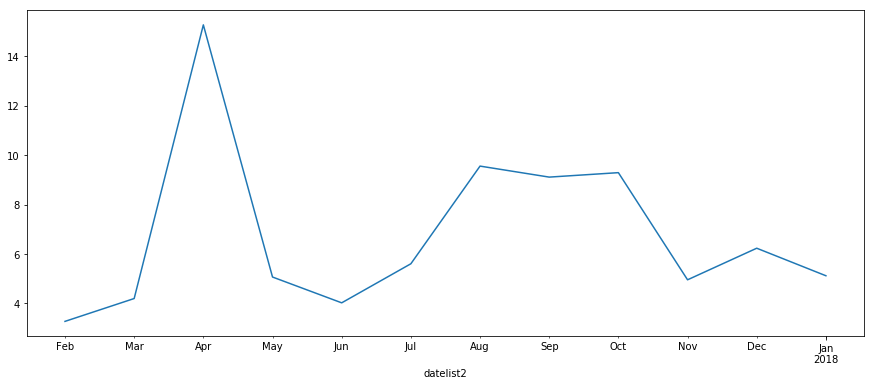

In [13]:
# plot demand over time
y.plot(figsize=(15, 6))
plt.show()

In [14]:
# create dataframe for price and make datetime data the index
dfprice = dfsorted[['datelist2','sevendavgretail']]
dfprice = dfprice.set_index('datelist2')

In [15]:
dfprice.index

DatetimeIndex(['2017-02-05', '2017-02-05', '2017-02-05', '2017-02-05',
               '2017-02-05', '2017-02-05', '2017-02-05', '2017-02-05',
               '2017-02-05', '2017-02-05',
               ...
               '2018-01-28', '2018-01-28', '2018-01-28', '2018-01-28',
               '2018-01-28', '2018-01-28', '2018-01-28', '2018-01-28',
               '2018-01-28', '2018-01-28'],
              dtype='datetime64[ns]', name='datelist2', length=1309, freq=None)

In [16]:
# group into one month buckets and use the mean price for each month
y = dfprice['sevendavgretail'].resample('MS').mean()
y.head(5)

datelist2
2017-02-01    1.728034
2017-03-01    1.598881
2017-04-01    1.469176
2017-05-01    1.728808
2017-06-01    1.725150
Freq: MS, Name: sevendavgretail, dtype: float64

In [17]:
# check to see if any months have no data
y.isnull().sum()

0

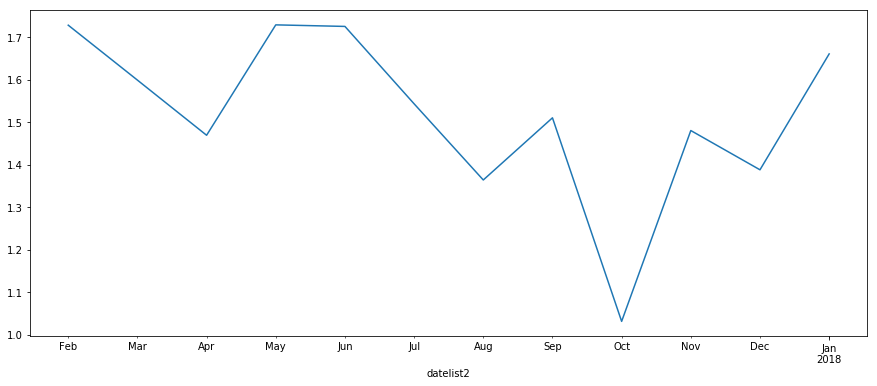

In [18]:
# generate time series plot for price
y.plot(figsize=(15, 6))
plt.show()